**Collins Kibet**

Spring 2021

CS 251: Data Analysis and Visualization

Project 5: Clustering - Extensions

In [6]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib.image import imread


import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1) Image compression:

**a) Compressing lorikeet image from lab 4**



In [15]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    img_flat = img.reshape((img.shape[0]*img.shape[1]), img.shape[2])
    
    return img_flat

(678, 907, 3)


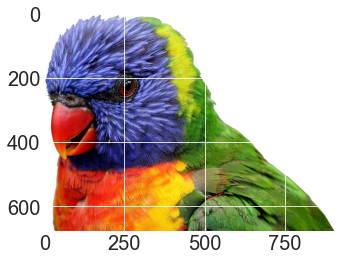

In [16]:
#load and show lorikeet img
lorikeet = imread('data/lorikeet.jpeg')
plt.imshow(lorikeet)

print(lorikeet.shape)

#rows and cols and rgb
rows = lorikeet.shape[0]
cols = lorikeet.shape[1]
rgb = lorikeet.shape[2]

In [30]:
#flatten jpeg image
lorikeet_flat = flatten(lorikeet)
#Create kmeans object with image data
lorikeet_kmeans = kmeans.KMeans(lorikeet_flat)
#run kmeans
lorikeet_kmeans.cluster(3)

# #run kmeans multiple times using cluster batch
# lorikeet_kmeans.cluster_batch(3, 50)

5066.1418992707795

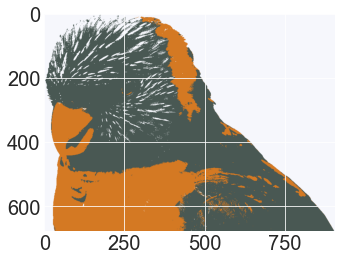

In [31]:
#replace each pixel value with its nearby centroid
lorikeet_kmeans.replace_color_with_centroid()
#Reshape image
lorikeet_reshaped_back = np.reshape(lorikeet_kmeans.data, (rows,cols,rgb))
#Display image
plt.imshow(lorikeet_reshaped_back)

**b) Compressing apples image from lab 4**


(678, 907, 3)


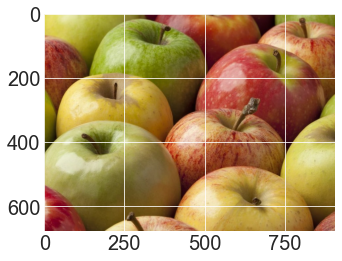

In [11]:
#load and show apples img
apples = imread('data/apples.jpeg')
plt.imshow(apples)

print(apples.shape)

#rows and cols and rgb
rows = apples.shape[0]
cols = apples.shape[1]
rgb = apples.shape[2]

In [12]:
#flatten jpeg image
apples_flat = flatten(apples)
#Create kmeans object with image data
apples_kmeans = kmeans.KMeans(apples_flat)
#run kmeans
apples_kmeans.cluster(3)

2837.928458131921

In [ ]:
lorikeet_kmeans.elbow_plot(7)

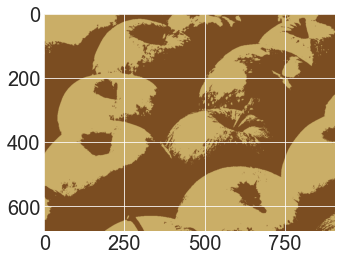

In [13]:
#replace each pixel value with its nearby centroid
apples_kmeans.replace_color_with_centroid()
#Reshape image
apples_reshaped_back = np.reshape(apples_kmeans.data, (rows,cols,rgb))
#Display image
plt.imshow(apples_reshaped_back)

## 2. Performing K-means Clustering on the iris dataset

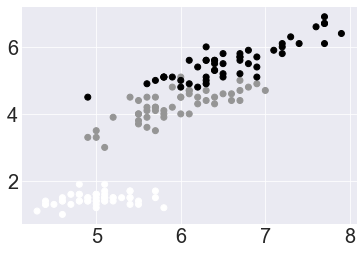

In [21]:
import pandas as pd

#Pandas df of super_simple.csv data
iris = pd.read_csv('data/iris.csv')

#Scatter plot of sepalLength and petalLength with color assigned as species
plt.scatter(iris['sepalLength'], iris['petalLength'], c = iris['species'])


After performing K-means on sepalLength and petalLength, we would expect the results to look like the scatterplot above which includes information about the type of species.

Calculate K-means on columns sepalLength and petalLength in the iris dataset

In [22]:
#have data with sepalLength and petalLength as numpy array
iris_data = iris[['sepalLength', 'petalLength']].astype('float')

In [23]:
#convert iris to numpy array
iris_data = iris_data.to_numpy()

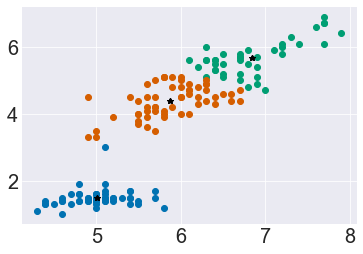

In [24]:
np.random.seed(0)
#Create kmeans object
iris_kmeans = kmeans.KMeans(iris_data)

#run K-means on super_simple data
iris_kmeans.cluster(3)

#plot clusters
iris_kmeans.plot_clusters()

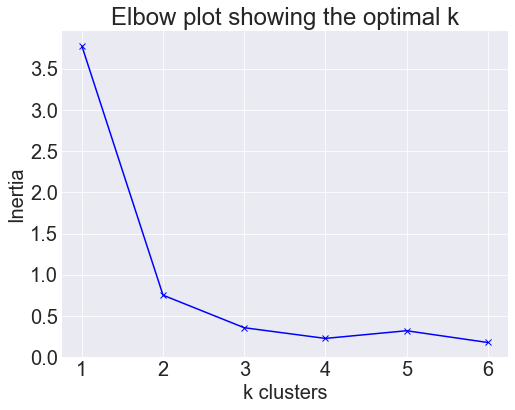

In [25]:
np.random.seed(3)

#elbow plot
iris_kmeans.elbow_plot(6)

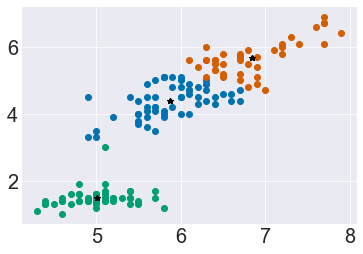

In [26]:
#run kmeans multiple times using cluster batch
iris_kmeans.cluster_batch(3, 50)

#plot clusters again to see if there are any improvements
iris_kmeans.plot_clusters()

The results of performing kmeans clustering on the sepalLength and petalLength columns of the iris datasets shows that there are exactly 3 clusters in the datasets. This makes sence since there are 3 different species represented in the dataset and all the flowers belonging to a particular species exhibit similar characteristics, which in this case is the variation between the length of their sepals and petals.